In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
#Load dataset
train = pd.read_csv("/home/anurag/ML/House_Price/train.csv")
test  = pd.read_csv("/home/anurag/ML/House_Price/test.csv")

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print('Train %s\nTest %s' % (train.shape, test.shape))

Train (1460, 81)
Test (1459, 80)


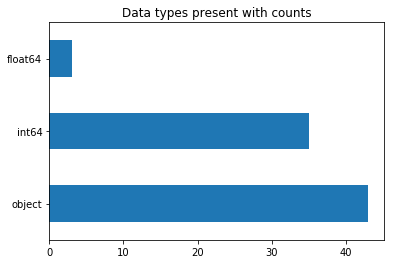

In [6]:
train.dtypes.value_counts().plot(kind = 'barh')
plt.title('Data types present with counts')
plt.show()

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.isnull().sum().sort_values(ascending = False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [9]:
train.skew(axis = 1, skipna = True) 

0       6.146334
1       6.134972
2       6.138704
3       6.116070
4       6.132632
5       6.072709
6       6.152831
7       6.055389
8       6.136054
9       6.119664
10      6.090351
11      6.152164
12      6.005991
13      6.149164
14      6.034849
15      6.137637
16      6.027201
17      6.023725
18      6.093279
19      6.130673
20      6.145500
21      6.132142
22      6.144744
23      6.146777
24      6.051981
25      6.134029
26      6.131855
27      6.149836
28      6.105562
29      6.064616
          ...   
1430    6.046670
1431    6.065539
1432    5.902013
1433    6.132980
1434    6.055735
1435    6.138145
1436    6.105754
1437    6.154210
1438    6.136187
1439    6.129751
1440    6.127223
1441    6.068825
1442    6.151400
1443    6.026804
1444    6.139269
1445    6.118620
1446    5.851432
1447    6.145985
1448    6.057791
1449    6.066438
1450    6.037105
1451    6.152867
1452    6.151649
1453    5.737701
1454    6.145284
1455    6.141124
1456    6.125196
1457    6.1512

# Data Preprocessing

In [10]:
train_id = train["Id"]
train.drop(['Id'],axis = 1 ,inplace=True)

test_id = test["Id"]
test.drop(['Id'],axis =1 ,inplace=True)

In [11]:
#select object columns
obj_col = train.columns[train.dtypes == 'object'].values

#select non object columns
num_col = train.columns[train.dtypes != 'object'].values
num_col_test = test.columns[test.dtypes != 'object'].values

#replace null value in obj columns with None
train[obj_col] = train[obj_col].fillna('None')
test[obj_col] = test[obj_col].fillna('None')

#replace null value in numeric columns with 0
train[num_col] = train[num_col].fillna(0)
test[num_col_test] = test[num_col_test].fillna(0)

In [12]:
#Ordinal features
ordinal_features = ["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure", 
                    "BsmtFinType1","BsmtFinType2","HeatingQC","Electrical","KitchenQual", 
                    "FireplaceQu","GarageQual","GarageCond","PoolQC"]
train[ordinal_features].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,None,TA,TA,None
1,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,SBrkr,TA,TA,TA,TA,None
2,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,SBrkr,Gd,TA,TA,TA,None
3,TA,TA,TA,Gd,No,ALQ,Unf,Gd,SBrkr,Gd,Gd,TA,TA,None
4,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,SBrkr,Gd,TA,TA,TA,None


In [13]:
#Map values
map_1 = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0}
map_2 = {"Gd":5,"Av":4,"Mn":3,"No":2,"None":1}
map_3 = {"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,"None":0}
map_4 = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}
map_5 = {"SBrkr":5,"FuseA":4,"FuseF":3,"FuseP":2,"Mix":1,"None":0}

#Encoding
train["ExterQual"] = train["ExterQual"].map(map_1)
train["ExterCond"] = train["ExterCond"].map(map_1)
train["BsmtQual"]  = train["BsmtQual"].map(map_1)
train["BsmtCond"]  = train["BsmtCond"].map(map_1)
train["BsmtExposure"] = train["BsmtExposure"].map(map_2)
train["BsmtFinType1"] = train["BsmtFinType1"].map(map_3)
train["BsmtFinType2"] = train["BsmtFinType2"].map(map_3)
train["HeatingQC"]   = train["HeatingQC"].map(map_4)
train["Electrical"]  = train["Electrical"].map(map_5)
train["KitchenQual"] = train["KitchenQual"].map(map_1)
train["FireplaceQu"] = train["FireplaceQu"].map(map_1)
train["GarageQual"]  = train["GarageQual"].map(map_1)
train["GarageCond"]  = train["GarageCond"].map(map_1)
train["PoolQC"]    = train["PoolQC"].map(map_1)

test["ExterQual"] = test["ExterQual"].map(map_1)
test["ExterCond"] = test["ExterCond"].map(map_1)
test["BsmtQual"]  = test["BsmtQual"].map(map_1)
test["BsmtCond"]  = test["BsmtCond"].map(map_1)
test["BsmtExposure"] = test["BsmtExposure"].map(map_2)
test["BsmtFinType1"] = test["BsmtFinType1"].map(map_3)
test["BsmtFinType2"] = test["BsmtFinType2"].map(map_3)
test["HeatingQC"]   = test["HeatingQC"].map(map_4)
test["Electrical"]  = test["Electrical"].map(map_5)
test["KitchenQual"] = test["KitchenQual"].map(map_1)
test["FireplaceQu"] = test["FireplaceQu"].map(map_1)
test["GarageQual"]  = test["GarageQual"].map(map_1)
test["GarageCond"]  = test["GarageCond"].map(map_1)
test["PoolQC"]   = test["PoolQC"].map(map_1)

In [14]:
train[ordinal_features].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,2,6,1,5,5,4,0,3,3,0
1,3,3,4,3,5,5,1,5,5,3,3,3,3,0
2,4,3,4,3,3,6,1,5,5,4,3,3,3,0
3,3,3,3,4,2,5,1,4,5,4,4,3,3,0
4,4,3,4,3,4,6,1,5,5,4,3,3,3,0


In [15]:
#Nominal features
nominal_features = [x for x in obj_col if x not in ordinal_features]

train[nominal_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,CentralAir,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,GasA,Y,Typ,Attchd,RFn,Y,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,GasA,Y,Typ,Attchd,RFn,Y,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,GasA,Y,Typ,Attchd,RFn,Y,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,GasA,Y,Typ,Detchd,Unf,Y,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,GasA,Y,Typ,Attchd,RFn,Y,None,None,WD,Normal


In [16]:
train.shape

(1460, 80)

In [17]:
#Transfer object to int
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#for loop nominal feature column
for i in train[nominal_features].columns:
    #fit and transform each column and assign to itself
    train[i] = labelencoder.fit_transform(train[i])
    
#for loop nominal feature column
for i in test[nominal_features].columns:
    #fit and transform each column and assign to itself
    test[i] = labelencoder.fit_transform(test[i])
    
#Get dummy variable for nominal features
train = pd.get_dummies(train,columns=nominal_features,drop_first=True)
test = pd.get_dummies(test,columns=nominal_features,drop_first=True)

In [18]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,0,1,0,0,0,1,0


In [19]:
#Only for test set
#Check if any null values
print(train.isnull().any().sum())
print(test.isnull().any().sum())

#Get missing columns in the training test
missing_cols = set(train.drop(["SalePrice"] , axis =1 ).columns) - set(test.columns)

#Add a missing column in test set with default value equal to 0
for cols in missing_cols:
    test[cols] = 0
    
#Ensure the order of column in the test set is in the same order than in train set
test = test[train.drop(["SalePrice"] , axis =1 ).columns]

0
0


In [20]:
train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_4', 'SaleType_5', 'SaleType_6', 'SaleType_7', 'SaleType_8',
       'SaleCondition_1', 'SaleCondition_2', 'SaleCondition_3',
       'SaleCondition_4', 'SaleCondition_5'],
      dtype='object', length=214)

# Feature Engineering 

In [59]:
#Totalbath
train["totalbath"] = train["FullBath"] + train["HalfBath"]
test["totalbath"] = test["FullBath"] + test["HalfBath"]


In [60]:
#HasPool
train['HasPool'] = train['PoolArea']
train[train['HasPool'] > 0] = 1

test['HasPool'] = test['PoolArea']
test[test['HasPool'] > 0] = 1

In [61]:
#HasFireplaces
train['HasFireplaces'] = train['Fireplaces']
train[train['HasFireplaces'] > 0] = 1

test['HasFireplaces'] = test['Fireplaces']
test[test['HasFireplaces'] > 0] = 1


# Models

In [62]:
#Importing Packages
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [63]:
#define a evaluation function, Root Mean Squared Logarithmic Error (RMSLE)
def rmsle_score(preds, true):
    rmsle_score = (np.sum((np.log1p(preds)-np.log1p(true))**2)/len(true))**0.5
    return rmsle_score

In [64]:
#Test Model
def test_model(model, X_train, y_train):
    RMSLE  = make_scorer(rmsle_score)
    cv = KFold(n_splits=5,shuffle=True,random_state=45)
    RMSLE_score = cross_val_score(model, X_train, y_train, cv = cv ,scoring = RMSLE )
    score=[RMSLE_score.mean()]
    
    return score


In [65]:
#Fit models
def fit_models(X_train, y_train, test):
    results={}
    
    model = linear_model.LinearRegression()
    results["Linear"]=test_model(model, X_train, y_train)
    
    model = linear_model.Ridge()
    results["Ridge"]=test_model(model, X_train, y_train)
    
    model = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(model, X_train, y_train)
    
    model = linear_model.HuberRegressor()
    results["Hubber"]=test_model(model, X_train, y_train)
    
    model = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(model, X_train, y_train)
    
    model = BaggingRegressor()
    results["Bagging"]=test_model(model, X_train, y_train)
    
    model = RandomForestRegressor()
    results["RandomForest"]=test_model(model, X_train, y_train)
    
    model = AdaBoostRegressor()
    results["AdaBoost"]=test_model(model, X_train, y_train)
    
    model = svm.SVR()
    results["SVM RBF"]=test_model(model, X_train, y_train)
    
    model = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(model, X_train, y_train)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Square Score"] 
    results = results.sort_values("Square Score", ascending=False)
    
    return results

In [67]:
# Split data to X(features)  and y(target)
X = train.drop(["SalePrice"] , axis =1 )
y = train["SalePrice"]


In [68]:
fit_models(X, y, test)

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until
/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until
/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until
/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until
/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel

,Square Score
AdaBoost,6.410545
SVM RBF,3.781475
Linear,2.354982
Hubber,0.497844
Bayesian Ridge,0.255829
Ridge,0.244511
Lasso,0.141560
SVM Linear,0.114622
Bagging,0.105254
RandomForest,0.101746


In [70]:
# Create linear regression object
regr = LinearRegression()

regr.fit(X, y)
test_y_pred = regr.predict(test)

submission = pd.DataFrame({'Id':test_id,'SalePrice':test_y_pred})

# Save results
submission.to_csv("submission_linear_regression.csv",index=False)

In [ ]:
regr = LinearRegression()

regr.fit(X, y)
test_y_pred = regr.predict(test)

submission = pd.DataFrame({'Id':test_id,'SalePrice':test_y_pred})

# Save results
submission.to_csv("submission_linear_regression.csv",index=False)

In [72]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=100) 
rr.fit(X, y)

test_y_pred = rr.predict(test)
submission = pd.DataFrame({'Id':test_id,'SalePrice':test_y_pred})

# Save results
submission.to_csv("submission_ridge_regression.csv",index=False)


In [73]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=100) 
ll.fit(X, y)

test_y_pred = ll.predict(test)
submission = pd.DataFrame({'Id':test_id,'SalePrice':test_y_pred})

# Save results
submission.to_csv("submission_lasso_regression.csv",index=False)


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [74]:
model_RF = RandomForestRegressor()
model_RF.fit(X, y)

test_y_pred = model_RF.predict(test)
submission = pd.DataFrame({'Id':test_id,'SalePrice':test_y_pred})

# Save results
submission.to_csv("submission_Random_Forest.csv",index=False)

/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [75]:
model_Ada = AdaBoostRegressor()
model_Ada.fit(X, y)

test_y_pred = model_Ada.predict(test)
submission = pd.DataFrame({'Id':test_id,'SalePrice':test_y_pred})

# Save results
submission.to_csv("submission_Ada_Boost.csv",index=False)